In [20]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

In [21]:
# generate 20 data points
N = 20

#random data on x-axis
x= np.random.rand(N)*10-5

y = 0.5*x -1+ np.random.rand(N)

In [22]:
x

array([-2.28616111, -1.47748087, -2.28611071, -4.79418178,  2.42113123,
        1.95867365, -3.94785885, -2.49973375,  3.13927143, -2.33609472,
       -3.02929637,  1.76380044, -0.82899855, -3.59531924,  1.83717355,
        2.01393096, -3.29988702, -2.8965394 ,  0.97790002,  1.82393393])

In [23]:
y

array([-1.6653366 , -1.57224955, -2.05445345, -2.53077169,  0.2787301 ,
        0.14048222, -2.19759455, -2.03122118,  0.67850986, -2.15895764,
       -2.15480251, -0.11057127, -0.99929587, -2.44586805,  0.15324459,
        0.98250315, -2.03083474, -1.96372055, -0.42723316,  0.57339718])

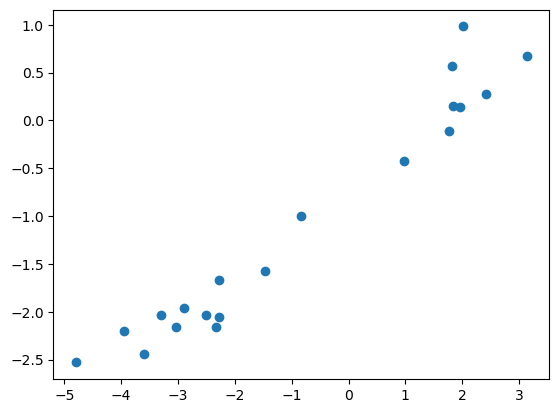

In [24]:
plt.scatter(x,y)

In [25]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = x.reshape(N, 1)
Y = y.reshape(N, 1)

In [26]:
def Gradient(m,b) :
    
    grad_m =0; grad_b = 0;

    for i in range(N) :
        grad_m += -X[i]*(Y[i]- (m*X[i]+b))
        grad_b += - (Y[i]- (m*X[i]+b) )

    return grad_m, grad_b

Gradient(-1,-1)

(array([-198.08669182]), array([18.87789087]))

In [27]:
n_epochs      = 1000
learning_rate = 0.01
theta         = np.random.rand(2,1)

for i in range(n_epochs) :
    grad_m, grad_b = Gradient(theta[0], theta[1])
    theta[0] -= learning_rate*grad_m
    theta[1] -= learning_rate*grad_b


theta 

array([[ 0.4616658],
       [-0.6764953]])

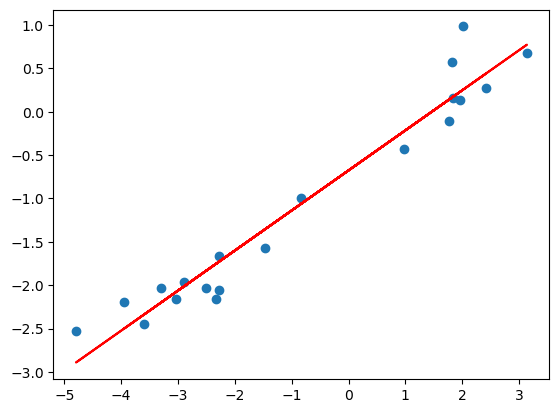

In [28]:
predict = theta[0]*X + theta[1]
plt.plot(X, predict, 'r')
plt.scatter(x,y)

In [29]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [30]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [31]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [32]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 1.8564
Epoch 2/30, Loss: 1.2860
Epoch 3/30, Loss: 1.0598
Epoch 4/30, Loss: 0.8925
Epoch 5/30, Loss: 0.7551
Epoch 6/30, Loss: 0.6409
Epoch 7/30, Loss: 0.5458
Epoch 8/30, Loss: 0.4667
Epoch 9/30, Loss: 0.4008
Epoch 10/30, Loss: 0.3460
Epoch 11/30, Loss: 0.3003
Epoch 12/30, Loss: 0.2623
Epoch 13/30, Loss: 0.2307
Epoch 14/30, Loss: 0.2044
Epoch 15/30, Loss: 0.1825
Epoch 16/30, Loss: 0.1643
Epoch 17/30, Loss: 0.1491
Epoch 18/30, Loss: 0.1365
Epoch 19/30, Loss: 0.1259
Epoch 20/30, Loss: 0.1172
Epoch 21/30, Loss: 0.1099
Epoch 22/30, Loss: 0.1038
Epoch 23/30, Loss: 0.0988
Epoch 24/30, Loss: 0.0946
Epoch 25/30, Loss: 0.0911
Epoch 26/30, Loss: 0.0882
Epoch 27/30, Loss: 0.0858
Epoch 28/30, Loss: 0.0837
Epoch 29/30, Loss: 0.0821
Epoch 30/30, Loss: 0.0807


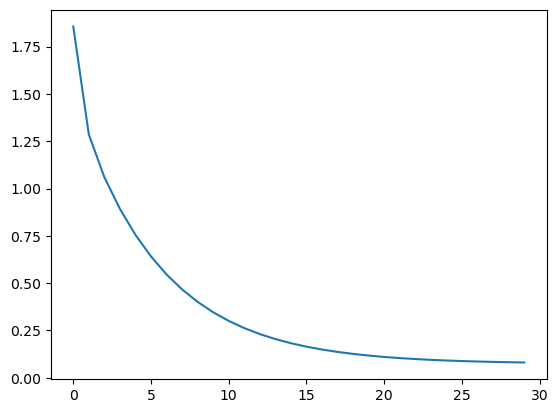

In [33]:
# Plot the loss per iteration
plt.plot(losses);

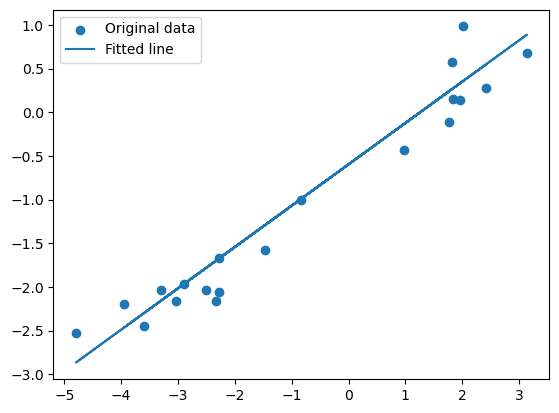

In [34]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [35]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
m = model.weight.data.numpy()
b = model.bias.data.numpy()
print(m, b)

[[0.47310516]] [-0.5961329]
